# Week 7 Quiz - Adam Thomson - Hadamard Gate

## Use Qiskit to verify the effect of the Hadamard Gate  (H) on the vector (1,0). You will need to show a hand calculation, the Qiskit result and interpret.

### Calculate the result of H((1,0))

In [11]:
import numpy as np

vec0 = np.array([1,0])
had = (2**(-1/2)) * np.array([[1,1], [1,-1]])

had0 = np.dot(had, vec0)
print(f'Applying Hadamard Gate to (1,0) results in: {had0}')

# Square each aplitude to get the probability of measurement
had_probs = [i**2 for i in had0]
print(f'Resulting in a measurement of <0: {round(had_probs[0], 5)}, 1: {round(had_probs[1], 5)}>')

Applying Hadamard Gate to (1,0) results in: [0.70710678 0.70710678]
Resulting in a measurement of <0: 0.5, 1: 0.5>


This superposition of 0 and 1 is foundational to quantum computing

### Verify results with qiskit

In [13]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

# Setup single qubit circuit, initialized to |0>
qch = QuantumCircuit(1)

# Apply Hadamard gate to our qubit
qch.h(0)

# Measure the new state of the quibit
qch.measure_all()

# Draw a diagram of the circuit
qch.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

### Sample circuit and plot results

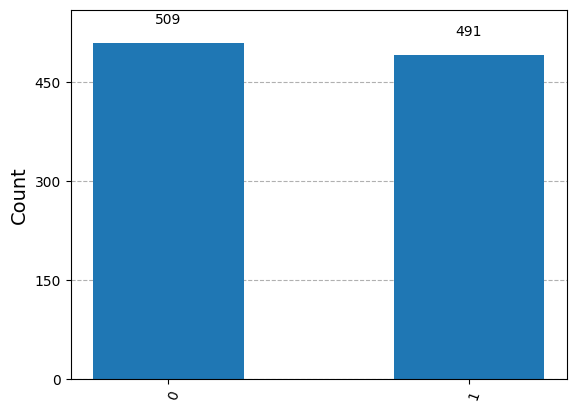

In [21]:
N_SAMPLES = 1000

# Setup a sampler and run the circuit N times to verify hand calculation
sampler = SamplerV2()
result = sampler.run([qch], shots=N_SAMPLES).result()
plot_histogram(result[0].data.meas.get_counts())

Resulting graph shows an average of N/2 counts for 0 and N/2 counts for 1!